In [1]:
#import libraries
import numpy as np
import pandas as pd

In [2]:
#Load the dataset
flight_data = pd.read_csv('flightdata.csv')
flight_data.head()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,UNIQUE_CARRIER,TAIL_NUM,FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
0,2016,1,1,1,5,DL,N836DN,1399,10397,ATL,...,2143,2102.0,-41.0,0.0,0.0,0.0,338.0,295.0,2182.0,NaN
1,2016,1,1,1,5,DL,N964DN,1476,11433,DTW,...,1435,1439.0,4.0,0.0,0.0,0.0,110.0,115.0,528.0,NaN
2,2016,1,1,1,5,DL,N813DN,1597,10397,ATL,...,1215,1142.0,-33.0,0.0,0.0,0.0,335.0,300.0,2182.0,NaN
3,2016,1,1,1,5,DL,N587NW,1768,14747,SEA,...,1335,1345.0,10.0,0.0,0.0,0.0,196.0,205.0,1399.0,NaN
4,2016,1,1,1,5,DL,N836DN,1823,14747,SEA,...,607,615.0,8.0,0.0,0.0,0.0,247.0,259.0,1927.0,NaN


In [3]:
flight_data.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK',
       'UNIQUE_CARRIER', 'TAIL_NUM', 'FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN',
       'DEST_AIRPORT_ID', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY',
       'DEP_DEL15', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY', 'ARR_DEL15',
       'CANCELLED', 'DIVERTED', 'CRS_ELAPSED_TIME', 'ACTUAL_ELAPSED_TIME',
       'DISTANCE', 'Unnamed: 25'],
      dtype='object')

In [4]:
flight_data.dtypes

YEAR                     int64
QUARTER                  int64
MONTH                    int64
DAY_OF_MONTH             int64
DAY_OF_WEEK              int64
UNIQUE_CARRIER          object
TAIL_NUM                object
FL_NUM                   int64
ORIGIN_AIRPORT_ID        int64
ORIGIN                  object
DEST_AIRPORT_ID          int64
DEST                    object
CRS_DEP_TIME             int64
DEP_TIME               float64
DEP_DELAY              float64
DEP_DEL15              float64
CRS_ARR_TIME             int64
ARR_TIME               float64
ARR_DELAY              float64
ARR_DEL15              float64
CANCELLED              float64
DIVERTED               float64
CRS_ELAPSED_TIME       float64
ACTUAL_ELAPSED_TIME    float64
DISTANCE               float64
Unnamed: 25            float64
dtype: object

In [5]:
# checking the dataype of the parameters(Columns)
flight_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11231 entries, 0 to 11230
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   YEAR                 11231 non-null  int64  
 1   QUARTER              11231 non-null  int64  
 2   MONTH                11231 non-null  int64  
 3   DAY_OF_MONTH         11231 non-null  int64  
 4   DAY_OF_WEEK          11231 non-null  int64  
 5   UNIQUE_CARRIER       11231 non-null  object 
 6   TAIL_NUM             11231 non-null  object 
 7   FL_NUM               11231 non-null  int64  
 8   ORIGIN_AIRPORT_ID    11231 non-null  int64  
 9   ORIGIN               11231 non-null  object 
 10  DEST_AIRPORT_ID      11231 non-null  int64  
 11  DEST                 11231 non-null  object 
 12  CRS_DEP_TIME         11231 non-null  int64  
 13  DEP_TIME             11124 non-null  float64
 14  DEP_DELAY            11124 non-null  float64
 15  DEP_DEL15            11124 non-null 

In [6]:
# Descriptive Analysis
flight_data.describe()

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_NUM,ORIGIN_AIRPORT_ID,DEST_AIRPORT_ID,CRS_DEP_TIME,DEP_TIME,...,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DEL15,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,DISTANCE,Unnamed: 25
count,11231.0,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11231.000000,11124.000000,...,11231.000000,11116.000000,11043.000000,11043.000000,11231.000000,11231.000000,11231.000000,11043.000000,11231.000000,0.0
mean,2016.0,2.544475,6.628973,15.790758,3.960199,1334.325617,12334.516695,12302.274508,1320.798326,1327.189410,...,1537.312795,1523.978499,-2.573123,0.124513,0.010150,0.006589,190.652124,179.661233,1161.031965,NaN
std,0.0,1.090701,3.354678,8.782056,1.995257,811.875227,1595.026510,1601.988550,490.737845,500.306462,...,502.512494,512.536041,39.232521,0.330181,0.100241,0.080908,78.386317,77.940399,643.683379,NaN
min,2016.0,1.000000,1.000000,1.000000,1.000000,7.000000,10397.000000,10397.000000,10.000000,1.000000,...,2.000000,1.000000,-67.000000,0.000000,0.000000,0.000000,93.000000,75.000000,509.000000,NaN
25%,2016.0,2.000000,4.000000,8.000000,2.000000,624.000000,10397.000000,10397.000000,905.000000,905.000000,...,1130.000000,1135.000000,-19.000000,0.000000,0.000000,0.000000,127.000000,117.000000,594.000000,NaN
50%,2016.0,3.000000,7.000000,16.000000,4.000000,1267.000000,12478.000000,12478.000000,1320.000000,1324.000000,...,1559.000000,1547.000000,-10.000000,0.000000,0.000000,0.000000,159.000000,149.000000,907.000000,NaN
75%,2016.0,3.000000,9.000000,23.000000,6.000000,2032.000000,13487.000000,13487.000000,1735.000000,1739.000000,...,1952.000000,1945.000000,1.000000,0.000000,0.000000,0.000000,255.000000,236.000000,1927.000000,NaN
max,2016.0,4.000000,12.000000,31.000000,7.000000,2853.000000,14747.000000,14747.000000,2359.000000,2400.000000,...,2359.000000,2400.000000,615.000000,1.000000,1.000000,1.000000,397.000000,428.000000,2422.000000,NaN


In [7]:
flight_data.shape

(11231, 26)

In [8]:
flight_data.isna().values.any()

True

In [9]:
flight_data.isna().sum()

YEAR                       0
QUARTER                    0
MONTH                      0
DAY_OF_MONTH               0
DAY_OF_WEEK                0
UNIQUE_CARRIER             0
TAIL_NUM                   0
FL_NUM                     0
ORIGIN_AIRPORT_ID          0
ORIGIN                     0
DEST_AIRPORT_ID            0
DEST                       0
CRS_DEP_TIME               0
DEP_TIME                 107
DEP_DELAY                107
DEP_DEL15                107
CRS_ARR_TIME               0
ARR_TIME                 115
ARR_DELAY                188
ARR_DEL15                188
CANCELLED                  0
DIVERTED                   0
CRS_ELAPSED_TIME           0
ACTUAL_ELAPSED_TIME      188
DISTANCE                   0
Unnamed: 25            11231
dtype: int64

In [10]:
flight_data['DEST'].unique()

array(['SEA', 'MSP', 'DTW', 'ATL', 'JFK'], dtype=object)

In [11]:
# Data Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='ARR_DELAY', ylabel='ARR_DEL15'>

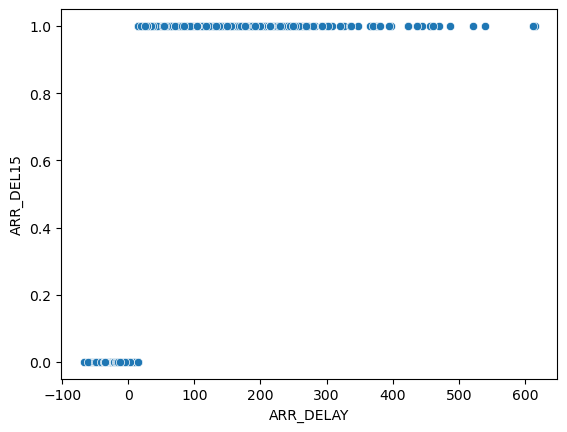

In [15]:
sns.scatterplot(x='ARR_DELAY',y='ARR_DEL15',data=flight_data)


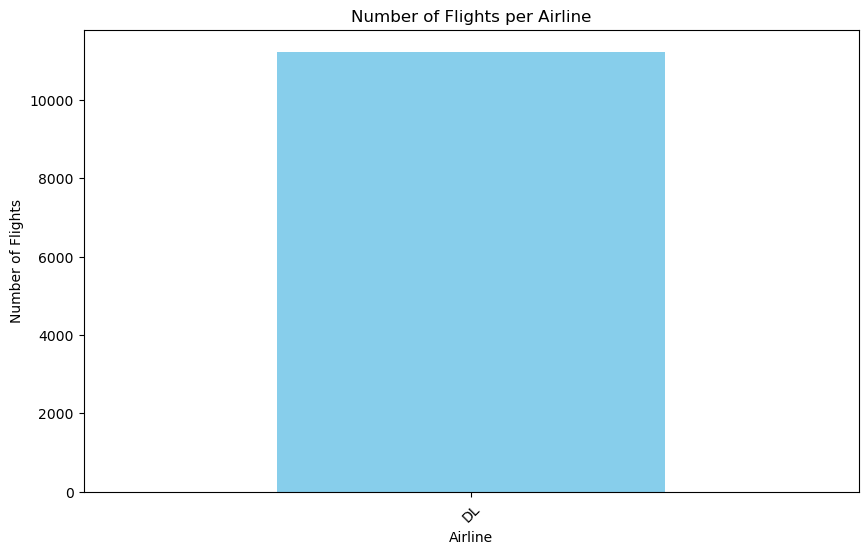

In [16]:
import matplotlib.pyplot as plt

# Count the number of flights for each airline
airline_counts = flight_data['UNIQUE_CARRIER'].value_counts()

# Plot the bar graph
plt.figure(figsize=(10, 6))
airline_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Flights per Airline')
plt.xlabel('Airline')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()



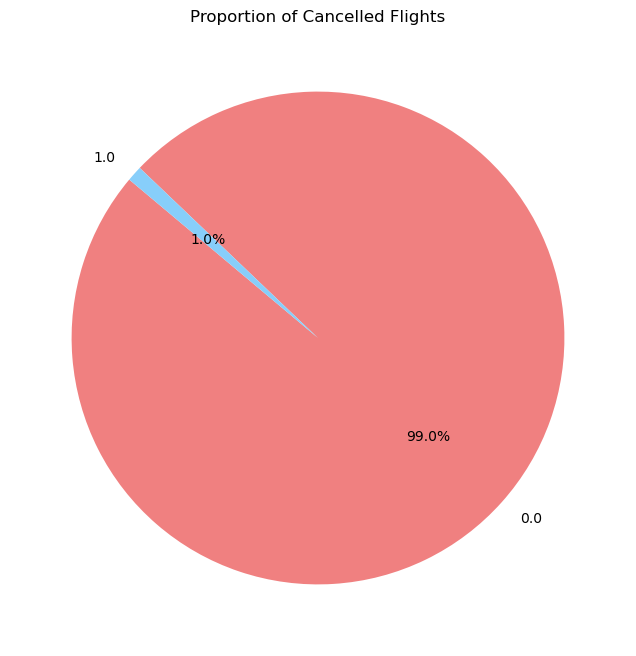

In [17]:
# Count the number of cancelled vs. not cancelled flights
cancelled_counts = flight_data['CANCELLED'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
cancelled_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'lightskyblue'])
plt.title('Proportion of Cancelled Flights')
plt.ylabel('')
plt.show()


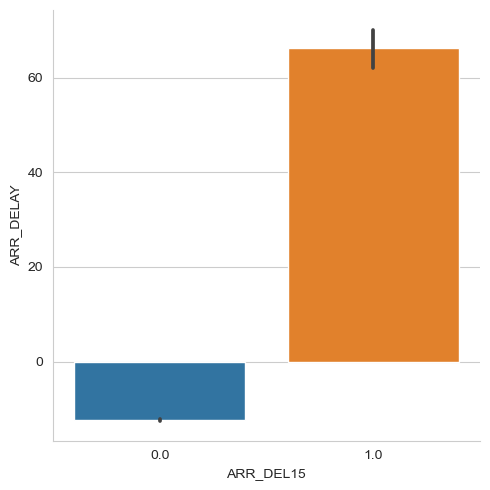

In [20]:
sns.catplot(x='ARR_DEL15',y='ARR_DELAY',kind='bar',data=flight_data)

In [22]:
flight_data = flight_data.drop('Unnamed: 25', axis = 1)
flight_data.isna().sum()

YEAR                     0
QUARTER                  0
MONTH                    0
DAY_OF_MONTH             0
DAY_OF_WEEK              0
UNIQUE_CARRIER           0
TAIL_NUM                 0
FL_NUM                   0
ORIGIN_AIRPORT_ID        0
ORIGIN                   0
DEST_AIRPORT_ID          0
DEST                     0
CRS_DEP_TIME             0
DEP_TIME               107
DEP_DELAY              107
DEP_DEL15              107
CRS_ARR_TIME             0
ARR_TIME               115
ARR_DELAY              188
ARR_DEL15              188
CANCELLED                0
DIVERTED                 0
CRS_ELAPSED_TIME         0
ACTUAL_ELAPSED_TIME    188
DISTANCE                 0
dtype: int64

In [23]:
flight_data = flight_data[["FL_NUM","MONTH", "DAY_OF_MONTH", "DAY_OF_WEEK", "ORIGIN", "DEST", "CRS_ARR_TIME","DEP_DEL15","ARR_DEL15"]]
flight_data.isna().sum()

FL_NUM            0
MONTH             0
DAY_OF_MONTH      0
DAY_OF_WEEK       0
ORIGIN            0
DEST              0
CRS_ARR_TIME      0
DEP_DEL15       107
ARR_DEL15       188
dtype: int64

In [24]:
#Replace missing value 0's and 1's 

flight_data=flight_data.fillna({'ARR_DEL15':1})
flight_data=flight_data.fillna({'DEP_DEL15':0})
flight_data.iloc[177:185]

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
177,2834,1,9,6,MSP,SEA,852,0.0,1.0
178,2839,1,9,6,DTW,JFK,1724,0.0,0.0
179,86,1,10,7,MSP,DTW,1632,0.0,1.0
180,87,1,10,7,DTW,MSP,1649,1.0,0.0
181,423,1,10,7,JFK,ATL,1600,0.0,0.0
182,440,1,10,7,JFK,ATL,849,0.0,0.0
183,485,1,10,7,JFK,SEA,1945,1.0,0.0
184,557,1,10,7,MSP,DTW,912,0.0,1.0


In [25]:
import math

for index, row in flight_data.iterrows():
    flight_data.loc[index, 'CRS_ARR_TIME'] = math.floor(row['CRS_ARR_TIME'] / 100)
flight_data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,ATL,SEA,21,0.0,0.0
1,1476,1,1,5,DTW,MSP,14,0.0,0.0
2,1597,1,1,5,ATL,SEA,12,0.0,0.0
3,1768,1,1,5,SEA,MSP,13,0.0,0.0
4,1823,1,1,5,SEA,DTW,6,0.0,0.0


In [26]:
flight_data.columns

Index(['FL_NUM', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'ORIGIN', 'DEST',
       'CRS_ARR_TIME', 'DEP_DEL15', 'ARR_DEL15'],
      dtype='object')

In [27]:
#Label Encoding 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [30]:
flight_data['DEST']=le.fit_transform(flight_data['DEST'])
flight_data['ORIGIN']=le.fit_transform(flight_data['ORIGIN'])

In [29]:
flight_data.head(5)

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,ORIGIN,DEST,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15
0,1399,1,1,5,0,4,21,0.0,0.0
1,1476,1,1,5,1,3,14,0.0,0.0
2,1597,1,1,5,0,4,12,0.0,0.0
3,1768,1,1,5,4,3,13,0.0,0.0
4,1823,1,1,5,4,1,6,0.0,0.0


In [31]:
#Split the data into dependent and independent variables

In [32]:
flight_data = pd.get_dummies(flight_data, columns=['ORIGIN','DEST'])
flight_data.head()

,FL_NUM,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CRS_ARR_TIME,DEP_DEL15,ARR_DEL15,ORIGIN_0,ORIGIN_1,ORIGIN_2,ORIGIN_3,ORIGIN_4,DEST_0,DEST_1,DEST_2,DEST_3,DEST_4
0,1399,1,1,5,21,0.0,0.0,True,False,False,False,False,False,False,False,False,True
1,1476,1,1,5,14,0.0,0.0,False,True,False,False,False,False,False,False,True,False
2,1597,1,1,5,12,0.0,0.0,True,False,False,False,False,False,False,False,False,True
3,1768,1,1,5,13,0.0,0.0,False,False,False,False,True,False,False,False,True,False
4,1823,1,1,5,6,0.0,0.0,False,False,False,False,True,False,True,False,False,False


In [33]:
x=flight_data.iloc[:,0:8].values
y=flight_data.iloc[:,8:9].values

In [34]:
#Split The Dataset Into Train Set And Test Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [35]:
x_test.shape

(2247, 8)

In [36]:
x_train.shape

(8984, 8)

In [37]:
y_test.shape

(2247, 1)

In [38]:
y_train.shape

(8984, 1)

In [39]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [40]:
lr=LogisticRegression()

In [41]:
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
pred

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([False, False, False, ..., False, False, False])

In [42]:
pred1=lr.predict(x_train)
pred1

array([False, False, False, ..., False, False, False])

In [43]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [44]:
accuracy_score(y_train,pred1)

0.8045414069456812

In [56]:
accuracy_score(y_test,pred)

0.9902091677792613

In [46]:
confusion_matrix(y_test,pred)

array([[1802,    0],
       [ 445,    0]], dtype=int64)

In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1802
        True       0.97      0.98      0.98       445

    accuracy                           0.99      2247
   macro avg       0.98      0.99      0.98      2247
weighted avg       0.99      0.99      0.99      2247



In [47]:
#DecisionTree
from sklearn.tree import DecisionTreeClassifier

In [49]:
df=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [50]:
df.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [51]:
pred=df.predict(x_test)
pred

array([ True, False, False, ...,  True, False, False])

In [52]:
y_test

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [53]:

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,pred)

0.9902091677792613

In [54]:
confusion_matrix(y_test,pred)

array([[1789,   13],
       [   9,  436]], dtype=int64)

In [55]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.99      0.99      0.99      1802
        True       0.97      0.98      0.98       445

    accuracy                           0.99      2247
   macro avg       0.98      0.99      0.98      2247
weighted avg       0.99      0.99      0.99      2247



In [59]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

In [60]:
rf=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)


In [61]:
#training the model
rf.fit(x_train,y_train)

C:\Users\Admin\AppData\Local\Temp\ipykernel_26504\3003225574.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [62]:
#test the model
pred=rf.predict(x_test)
pred

array([ True, False, False, ...,  True, False, False])

In [63]:
y_test

array([[ True],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [64]:
# Evaluate the model
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy=accuracy_score(y_test,pred)
conmat=confusion_matrix(y_test,pred)

In [65]:
print(accuracy)

0.8869603916332889


In [66]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

       False       0.89      0.98      0.93      1802
        True       0.86      0.51      0.64       445

    accuracy                           0.89      2247
   macro avg       0.88      0.75      0.79      2247
weighted avg       0.88      0.89      0.88      2247

